# 📘 Lesson 4 — The Perceptron: First Neural Network

---

### 🎯 Why this lesson matters
So far:
- **Linear regression** → predicted continuous values.
- But real problems often need **classification** (spam vs not spam, tumor vs healthy).  

👉 The **Perceptron** was the first algorithm (1958, Frank Rosenblatt) to perform binary classification using a model inspired by neurons.  
It marks the beginning of **neural networks**.

We’ll learn:
- What the perceptron is.
- Why it works for classification.
- How training happens with gradient descent.


In [ ]:
# Setup
import torch
torch.set_num_threads(1)
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(42)
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## 1) Biological Inspiration — WHY a "neuron"?

- A biological neuron receives many inputs.
- If inputs are strong enough, it "fires" (outputs 1), otherwise stays silent (0).
- The perceptron mimics this:
  $
  y = \text{step}(w \cdot x + b)
  $

👉 WHY important?
This gave birth to the idea that **learning = adjusting weights** on inputs to change decisions.


In [26]:
# Step activation function (hard threshold)
def step_function(x):
    return torch.tensor(1.0) if x >= 0 else torch.tensor(0.0)

print("step(-2) =", step_function(-2))
print("step(3)  =", step_function(3))


step(-2) = tensor(0.)
step(3)  = tensor(1.)


## 2) Perceptron Model — the math

Equation:
$
y = \text{step}(w \cdot x + b)
$

- **w** = weights (how important each feature is).
- **b** = bias (threshold shift).
- **step** = activation (0 or 1).

👉 WHY?
This transforms linear regression into a **binary classifier**.


In [27]:
class PerceptronManual:
    def __init__(self, n_inputs):
        self.w = torch.randn(n_inputs, requires_grad=True)
        self.b = torch.randn(1, requires_grad=True)

    def forward(self, x):
        z = torch.dot(self.w, x) + self.b
        return step_function(z)


## 3) Toy Example — AND Logic Gate

The perceptron was originally tested on simple logic gates.

Truth table (AND):
- (0,0) → 0
- (0,1) → 0
- (1,0) → 0
- (1,1) → 1

👉 WHY?
Because if perceptron can learn logic gates, it proves it can separate categories.


In [28]:
# Dataset: AND gate
X = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y = torch.tensor([[0.],[0.],[0.],[1.]])


## 4) Training Perceptron — WHY gradient descent?

The original Rosenblatt perceptron used a manual update rule.  
Today, we use **gradient descent** (like in regression), but with a **sigmoid** instead of step.  

👉 WHY sigmoid?
- Step is not differentiable → cannot use gradient descent.
- Sigmoid is smooth approximation → allows training.


In [29]:
class PerceptronNN(nn.Module):
    def __init__(self, n_inputs):
        super().__init__()
        self.linear = nn.Linear(n_inputs, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        return self.activation(self.linear(x))


## 5) Training on AND Gate


In [30]:
model = PerceptronNN(2)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

losses = []
for epoch in range(1000):
    y_pred = model(X)
    loss = criterion(y_pred, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())



In [31]:
losses

[0.6903240084648132,
 0.6773614287376404,
 0.6652129292488098,
 0.6538288593292236,
 0.6431612372398376,
 0.6331638097763062,
 0.6237923502922058,
 0.6150047779083252,
 0.6067611575126648,
 0.5990235805511475,
 0.5917565822601318,
 0.5849264860153198,
 0.5785019397735596,
 0.5724536180496216,
 0.5667539834976196,
 0.5613772869110107,
 0.5562999844551086,
 0.5514997243881226,
 0.5469560027122498,
 0.5426499247550964,
 0.53856360912323,
 0.5346807837486267,
 0.530986487865448,
 0.5274665951728821,
 0.5241084098815918,
 0.520899772644043,
 0.5178298354148865,
 0.5148885250091553,
 0.5120663642883301,
 0.5093547701835632,
 0.5067456960678101,
 0.5042319893836975,
 0.5018067955970764,
 0.49946391582489014,
 0.4971975088119507,
 0.4950023293495178,
 0.49287348985671997,
 0.49080657958984375,
 0.4887971878051758,
 0.4868416488170624,
 0.4849364161491394,
 0.4830781817436218,
 0.4812639355659485,
 0.47949087619781494,
 0.47775644063949585,
 0.4760582745075226,
 0.47439420223236084,
 0.47276204

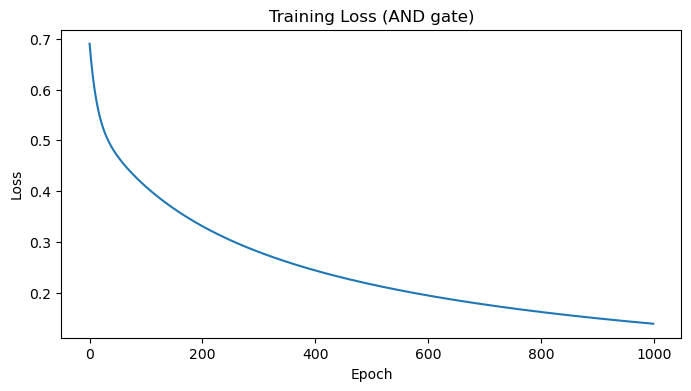

In [32]:
plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.title("Training Loss (AND gate)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

## 6) Predictions — did it learn?

👉 WHY check predictions?  
Loss decreasing is not enough — we must confirm model decisions match truth.


In [33]:
with torch.no_grad():
    print("Predictions:", model(X).round().view(-1).tolist())
    print("Targets:    ", y.view(-1).tolist())


Predictions: [0.0, 0.0, 0.0, 1.0]
Targets:     [0.0, 0.0, 0.0, 1.0]


## 7) Visualizing Decision Boundary

👉 WHY?  
A picture shows how perceptron separates inputs into 0 vs 1.


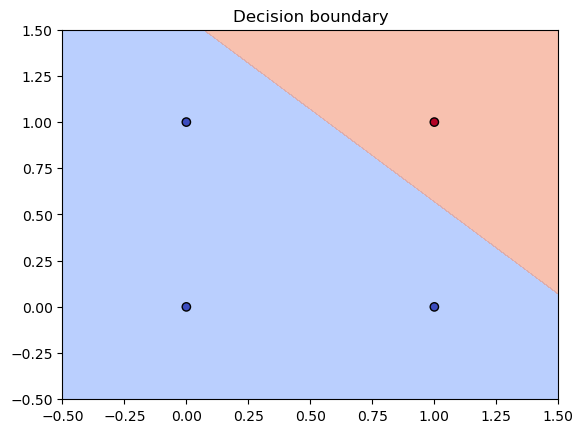

In [34]:
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    grid = torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()])
    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)
    plt.contourf(xx, yy, Z, levels=[0,0.5,1], cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y.view(-1), cmap="coolwarm", edgecolor="k")
    plt.title("Decision boundary")
    plt.show()

plot_decision_boundary(model, X, y)


## 8) Limitations of Perceptron

- Works only for **linearly separable problems** (AND, OR).
- Fails for XOR (not separable by straight line).  

👉 WHY important?  
This limitation caused the **AI winter** (1969, Minsky & Papert proved perceptron can’t solve XOR).  
Solution: add **multiple layers** → Multilayer Perceptron (next lesson).


In [35]:
# XOR dataset
X_xor = torch.tensor([[0.,0.],[0.,1.],[1.,0.],[1.,1.]])
y_xor = torch.tensor([[0.],[1.],[1.],[0.]])

# Train perceptron
model_xor = PerceptronNN(2)
optimizer = optim.SGD(model_xor.parameters(), lr=0.1)
criterion = nn.BCELoss()

for epoch in range(1000):
    y_pred = model_xor(X_xor)
    loss = criterion(y_pred, y_xor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

with torch.no_grad():
    preds = model_xor(X_xor).round().view(-1).tolist()

print("Predictions for XOR:", preds)
print("Targets:            ", y_xor.view(-1).tolist())


Predictions for XOR: [0.0, 0.0, 1.0, 1.0]
Targets:             [0.0, 1.0, 1.0, 0.0]


## ✅ Summary — Why Perceptron Matters

- First neural network model (1958).
- Introduced idea: weights + bias + activation.  
- Shows how classification works.  
- Limitation: cannot solve XOR → motivated **multilayer networks**.  

🚀 Next Lesson: **Multilayer Perceptron (MLP)** — how adding layers solves XOR and builds modern deep learning.
